In [27]:
import glob
import numpy as np

In [28]:
frds = glob.glob('output/ccx/*/*.frd')
dats = glob.glob('output/ccx/*/*.dat')

In [29]:
from djccx.read_dat import read_dat
from djccx.frd.readfrd import readfrd

In [30]:

from djccx.read_dat import read_dat

def compute_vol_frac(dat_path):
    dat = read_dat(dat_path)
    vols = [ idat["df"]["volume"].sum() for idat in dat]
    vols_frac = vols[0]/vols[1]
    return vols_frac

In [31]:
dats

['output/ccx\\SX\\main.dat',
 'output/ccx\\SY\\main.dat',
 'output/ccx\\X\\main.dat',
 'output/ccx\\Y\\main.dat']

In [32]:
vc = [ compute_vol_frac(idat) for idat in dats]

In [33]:
params_composite ={
    "r"         :  0.297,
    "factor_radius": 2,
    "h"         :  0.35,
    "z0"        :  0,
    "density"   : 8,
    "interface_factor"  :  1.2,
    "with_interface"    : False,
    "mirror"            : True,
    "check_jacobian"    : False,
}

params_ccx = {
    "epsilon" : 0.1,
    "x_fixed" : True
}
params = {
    "mesh" : params_composite,
    "ccx"  : params_ccx,
}

In [34]:


def compute_E_eff(iffiles):

    ancho = params_composite["h"]
    largo = 10 
    A = ancho*largo
    ifrd = readfrd(iffiles)
    df = ifrd["data"]
    Sapl = np.sum(df["F2"]*(df["y"] > df["y"].mean()))/A

    E_eff = Sapl / params["ccx"]["epsilon"]
    return E_eff

E_effs = [compute_E_eff(f) for f in frds]


In [35]:
frds

['output/ccx\\SX\\main.frd',
 'output/ccx\\SY\\main.frd',
 'output/ccx\\X\\main.frd',
 'output/ccx\\Y\\main.frd']

In [36]:
rows = ["ESX", "ESY", "EX", "EY"]
unit = ["GPa", "GPa", "GPa", "GPa"]
vc = np.array(vc)
import pandas as pd
df_FEM  = pd.DataFrame({"E_eff" :  np.array(E_effs)*1e-3,
                        "unit"  :  "GPa",
                        "fraction" : 100*vc,
                        "unit "  :  "%"
                        }, index = rows)

*MATERIAL, NAME=MATRIX
424.9548333333332,0.265

*MATERIAL, NAME=CARBON
10952.380952380952,0.3

*MATERIAL, NAME=NUCLEO
800,0.3

In [37]:
df_FEM

,E_eff,unit,fraction,unit
ESX,0.869032,GPa,23.143420,%
ESY,0.890558,GPa,23.143419,%
EX,1.149350,GPa,47.502382,%
EY,5.520758,GPa,47.502382,%


In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

NameError: name 'Et_exp' is not defined

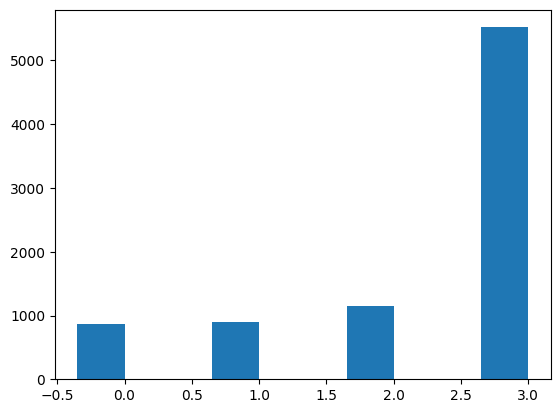

In [39]:


# bar compare 
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(E_effs))
ax.bar(x - width/2, E_effs, width, label='FEM')
ax.bar(x + width/2, Et_exp, width, label='Experimental')
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.legend()
plt.ylabel(r"$E_{tracción} \ [GPa]$")
plt.grid()

In [ ]:
# plot bar error
fig, ax = plt.subplots()

ax.bar(x, 100*error_rel, width, label='Error')

ax.set_xticks(x);
ax.set_xticklabels(names)
plt.grid()
plt.ylabel(r"$\varepsilon_{rel} \ [\%]$")